# **Simulate the Digital-Digital Conversion Techniques (Line Coding and Decoding Block Coding and Decoding Schemes)**


---





> **<h3>Line Coding:**



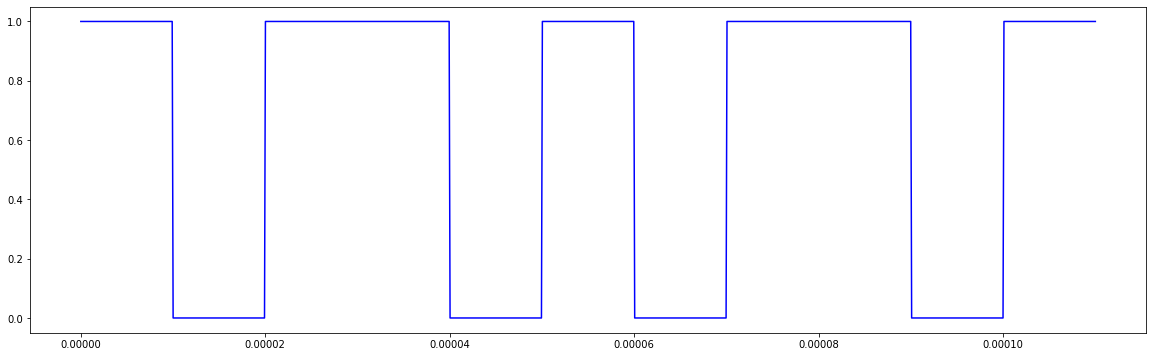

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

bits = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time,100)

x = np.array([])
for i in range(N):
  temp = bits[i]* np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.figure(figsize=(20,6))
plt.plot(t, x,'b')
plt.show()



>  **<h4><center>Line Coding Encoding - Unipolar - Non Return to Zero(NRZ)**



In [ ]:
result = []
counter = 0
for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = counter + 1
    result.append(int(x[i]))

print(result)

[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]


**<h4><center>Line Coding Decoding - Unipolar - Non Return to Zero(NRZ)**



> **<h3>Block Coding:**



In [ ]:
mB = 4
nB = 5
def get_Mapping_Codes(bits):
  return block_coding_mapping_codes["".join(map(str, bits))]
  
def get_MB_NB_Encoding(bits, mB, nB):
 
  if len(bits) % mB != 0:
  
    extra_len = (((len(bits)// mB) + 1) * mB) - len(bits)
    extra = np.array(np.zeros(extra_len), dtype=int)
    bits = np.append(bits, extra)
  
  encoded_bits_str = ""
  for i in range(0, len(bits), mB):
    encoded_bits_str += get_Mapping_Codes(bits[i:i+mB])

  encoded_bits_list = list(encoded_bits_str)
  encoded_bits_map = map(int, encoded_bits_list)
  encoded_bits = np.array(list(encoded_bits_map))
  return encoded_bits

def get_NB_MB_Decoding(bits, mB, nB):
  if len(bits) % nB != 0:
    print("Invalid length, Decoding Not possible!")
    return
  decoded_bits_str = ""
  for i in range(0, len(bits), nB):
    decoded_bits_str += get_Mapping_Codes(bits[i:i+nB])
  
  decoded_bits_list = list(decoded_bits_str)
  decoded_bits_map = map(int, decoded_bits_list)
  decoded_bits = np.array(list(decoded_bits_map))
  return decoded_bits

**<h4><center>Mapping Codes**

In [ ]:
bits = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int) 
bits = get_MB_NB_Encoding(bits, mB, nB)

**<h4><center>$4B/5B $  Encoding**

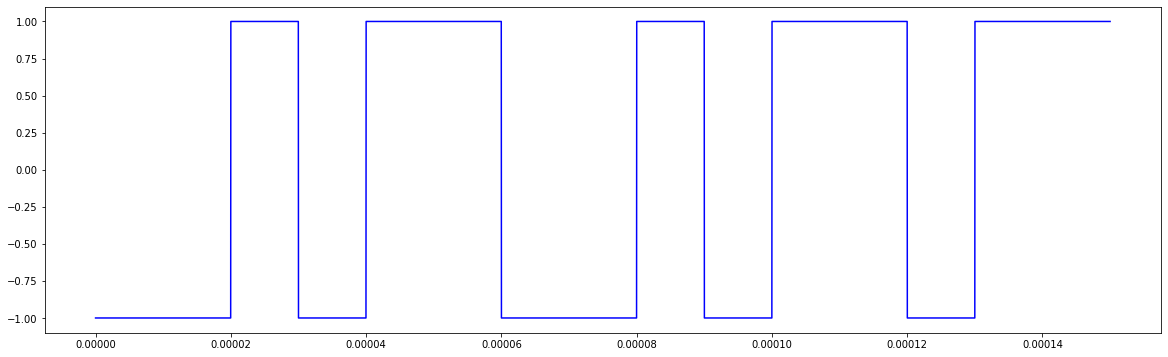

In [ ]:
Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time, mB * 100)

x = np.array([])
last_bit = 1
for i in range(N):
  if bits[i] == 1:
    temp = (-1) * last_bit * np.ones(len(T))
    last_bit = -last_bit
  else:
    temp = last_bit * np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))
plt.figure(figsize=(20,6))
plt.plot(t, x,'b')
plt.show()

**<center><h4>$NRZ-I$ Line Coding Encoding**

In [ ]:
result = []
counter = 0
last_bit = 1
for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = counter + 1
    if x[i] != last_bit:
      result.append(1)
      last_bit=-last_bit
    else:
      result.append(0)

print(result)

[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]


**<center><h4>$NRZ-I$ Line Coding Decoding**

In [ ]:
decoded_result = get_NB_MB_Decoding(result, mB, nB)
print(decoded_result)

[1 0 1 1 0 1 0 1 1 0 1 0]


**<h4><center>$4B/5B $  Decoding**